In [2]:
from basico import *
import matplotlib.pyplot as plt

In [3]:
# --- New Model ---
new_model(name='Ecoli_ROS_Response')


<CDataModel "Root">

In [4]:
# Compartment
add_compartment('cytoplasm', 1.0)


<CCompartment "cytoplasm">

In [5]:
# Species (molecule counts, SBML IDs)
# Oxidative stress (H2O2 / OxyR)
set_species(name='H2O2', sbml_id='H2O2', initial_concentration=50)
set_species(name='OxyR', sbml_id='OxyR', initial_concentration=100)
set_species(name='OxyR*', sbml_id='OxyRox', initial_concentration=0)
set_species(name='KatG', sbml_id='KatG', initial_concentration=0)
set_species(name='AhpCF', sbml_id='AhpCF', initial_concentration=0)

# Superoxide stress (O2- / SoxRS)
set_species(name='O2-', sbml_id='O2m', initial_concentration=30)   # superoxide anion
set_species(name='SoxR', sbml_id='SoxR', initial_concentration=50) # inactive
set_species(name='SoxR*', sbml_id='SoxRox', initial_concentration=0) # oxidized active
set_species(name='SoxS', sbml_id='SoxS', initial_concentration=0)   # transcriptional activator
set_species(name='SodA', sbml_id='SodA', initial_concentration=0)   # superoxide dismutase


In [6]:
# --- Reactions ---
## OxyR system
add_reaction(name='OxyR_activation', sbml_id='R_act',
             scheme='OxyR + H2O2 -> OxyRox', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_act).k1', value=0.01)

add_reaction(name='KatG_synthesis', sbml_id='R_katG',
             scheme='OxyRox -> OxyRox + KatG', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_katG).k1', value=0.05)

add_reaction(name='AhpCF_synthesis', sbml_id='R_ahpCF',
             scheme='OxyRox -> OxyRox + AhpCF', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_ahpCF).k1', value=0.02)

add_reaction(name='KatG_detox', sbml_id='R_detox1',
             scheme='H2O2 + KatG -> KatG', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_detox1).k1', value=0.01)

add_reaction(name='AhpCF_detox', sbml_id='R_detox2',
             scheme='H2O2 + AhpCF -> AhpCF', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_detox2).k1', value=0.005)

add_reaction(name='KatG_degradation', sbml_id='R_dKatG',
             scheme='KatG -> ', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_dKatG).k1', value=0.001)

add_reaction(name='AhpCF_degradation', sbml_id='R_dAhp',
             scheme='AhpCF -> ', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_dAhp).k1', value=0.001)

## SoxRS system
add_reaction(name='SoxR_activation', sbml_id='R_soxR',
             scheme='SoxR + O2m -> SoxRox', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_soxR).k1', value=0.02)

add_reaction(name='SoxS_synthesis', sbml_id='R_soxS',
             scheme='SoxRox -> SoxRox + SoxS', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_soxS).k1', value=0.05)

add_reaction(name='SodA_synthesis', sbml_id='R_sodA',
             scheme='SoxS -> SoxS + SodA', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_sodA).k1', value=0.03)

add_reaction(name='SodA_detox', sbml_id='R_sodA_detox',
             scheme='O2m + SodA -> SodA', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_sodA_detox).k1', value=0.02)

add_reaction(name='SoxS_degradation', sbml_id='R_dSoxS',
             scheme='SoxS -> ', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_dSoxS).k1', value=0.005)

add_reaction(name='SodA_degradation', sbml_id='R_dSodA',
             scheme='SodA -> ', rate_law='Mass action (irreversible)')
set_reaction_parameters(name='(R_dSodA).k1', value=0.001)


In [7]:
# --- Simulation ---
result = run_time_course(duration=200, step_number=400, method='deterministic')


In [8]:
result

,H2O2,KatG,AhpCF,O2m,SoxS,SodA,OxyRox,SoxRox,SoxR,OxyR
Time,,,,,,,,,,
0.0,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.5,8.616832e-01,1.001152,1.001152,9.059150e-01,1.001171,1.000020,1.045386,1.046485,0.953515,0.954614
1.0,7.438706e-01,1.004260,1.004260,8.224575e-01,1.004394,1.000147,1.082873,1.086771,0.913229,0.917127
1.5,6.430149e-01,1.008883,1.008883,7.480866e-01,1.009295,1.000469,1.114070,1.121902,0.878098,0.885930
2.0,5.563368e-01,1.014674,1.014674,6.815460e-01,1.015560,1.001048,1.140193,1.152706,0.847294,0.859807
...,...,...,...,...,...,...,...,...,...,...
198.0,-3.341669e-16,1.289617,1.289617,-2.910383e-15,1.426590,1.426590,1.289617,1.426590,0.573410,0.710383
198.5,-3.326477e-16,1.289617,1.289617,-3.186373e-15,1.426590,1.426590,1.289617,1.426590,0.573410,0.710383
199.0,-3.310118e-16,1.289617,1.289617,-3.452694e-15,1.426590,1.426590,1.289617,1.426590,0.573410,0.710383


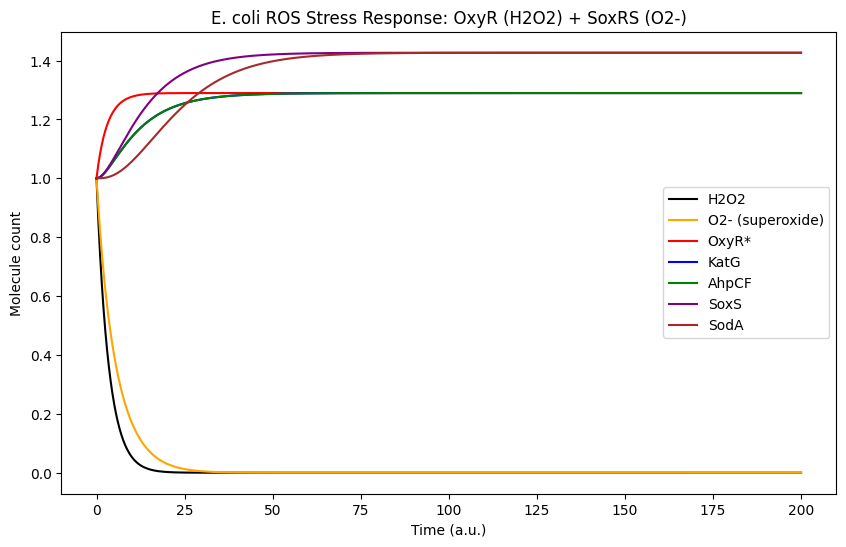

In [11]:

# --- Plot ---
fig, ax = plt.subplots(figsize=(10,6))
result.plot(y='H2O2', ax=ax, color='black', label='H2O2')
result.plot(y='O2m', ax=ax, color='orange', label='O2- (superoxide)')
result.plot(y='OxyRox', ax=ax, color='red', label='OxyR*')
result.plot(y='KatG', ax=ax, color='blue', label='KatG')
result.plot(y='AhpCF', ax=ax, color='green', label='AhpCF')
result.plot(y='SoxS', ax=ax, color='purple', label='SoxS')
result.plot(y='SodA', ax=ax, color='brown', label='SodA')

ax.set_xlabel("Time (a.u.)")
ax.set_ylabel("Molecule count")
ax.set_title("E. coli ROS Stress Response: OxyR (H2O2) + SoxRS (O2-)")
ax.legend()
plt.show()


In [ ]:
# --- Export ---
# save_model('Ecoli_ROS_model.cps')
# save_model('Ecoli_ROS_model.xml', sbml=True)
# print("Model exported as Ecoli_ROS_model.cps and Ecoli_ROS_model.xml")

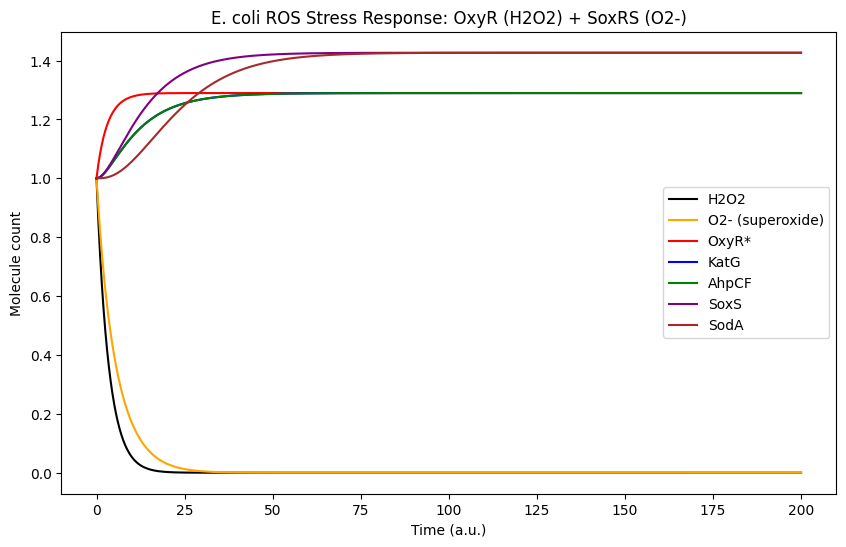

               H2O2      KatG     AhpCF           O2m      SoxS      SodA  \
Time                                                                        
0.0    1.000000e+00  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
0.5    8.616832e-01  1.001152  1.001152  9.059150e-01  1.001171  1.000020   
1.0    7.438706e-01  1.004260  1.004260  8.224575e-01  1.004394  1.000147   
1.5    6.430149e-01  1.008883  1.008883  7.480866e-01  1.009295  1.000469   
2.0    5.563368e-01  1.014674  1.014674  6.815460e-01  1.015560  1.001048   
...             ...       ...       ...           ...       ...       ...   
198.0 -3.341669e-16  1.289617  1.289617 -2.910383e-15  1.426590  1.426590   
198.5 -3.326477e-16  1.289617  1.289617 -3.186373e-15  1.426590  1.426590   
199.0 -3.310118e-16  1.289617  1.289617 -3.452694e-15  1.426590  1.426590   
199.5 -3.292592e-16  1.289617  1.289617 -3.709344e-15  1.426590  1.426590   
200.0 -3.273899e-16  1.289617  1.289617 -3.956324e-15  1.426590  1.426590   

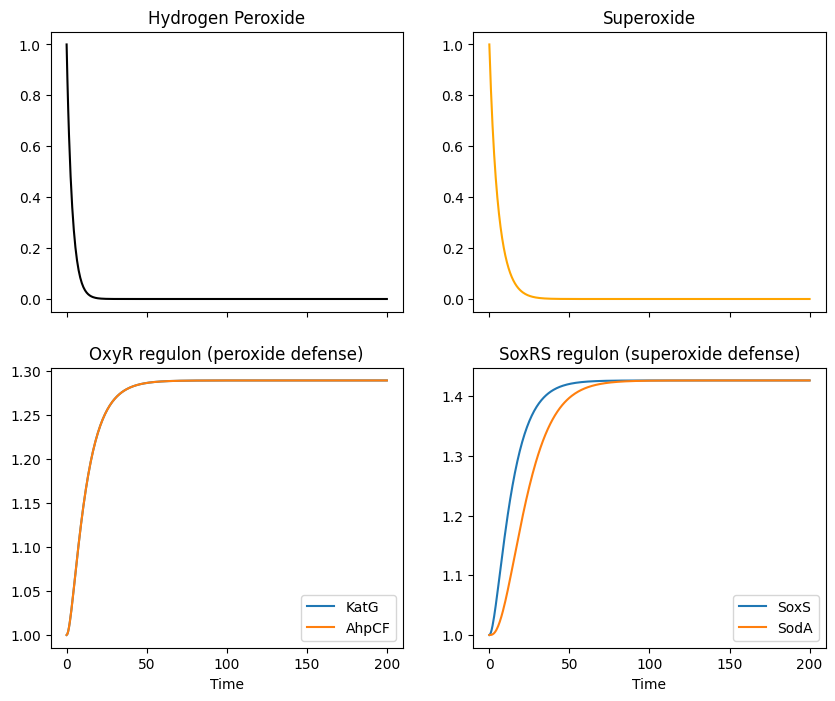

In [12]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(10,6))
result.plot(y='H2O2', ax=ax, color='black', label='H2O2')
result.plot(y='O2m', ax=ax, color='orange', label='O2- (superoxide)')
result.plot(y='OxyRox', ax=ax, color='red', label='OxyR*')
result.plot(y='KatG', ax=ax, color='blue', label='KatG')
result.plot(y='AhpCF', ax=ax, color='green', label='AhpCF')
result.plot(y='SoxS', ax=ax, color='purple', label='SoxS')
result.plot(y='SodA', ax=ax, color='brown', label='SodA')

ax.set_xlabel("Time (a.u.)")
ax.set_ylabel("Molecule count")
ax.set_title("E. coli ROS Stress Response: OxyR (H2O2) + SoxRS (O2-)")
ax.legend()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True)

result.plot(y='H2O2', ax=axes[0,0], color='black', legend=None)
axes[0,0].set_title("Hydrogen Peroxide")

result.plot(y='O2m', ax=axes[0,1], color='orange', legend=None)
axes[0,1].set_title("Superoxide")

result.plot(y=['KatG','AhpCF'], ax=axes[1,0])
axes[1,0].set_title("OxyR regulon (peroxide defense)")

result.plot(y=['SoxS','SodA'], ax=axes[1,1])
axes[1,1].set_title("SoxRS regulon (superoxide defense)")

# plt.tight_layout()
# plt.show()

print(result)
